<a href="https://colab.research.google.com/github/sychun/colab/blob/master/h_nn_hello_nn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [3]:
(train_X, train_y), (test_X, test_y) = keras.datasets.mnist.load_data()

In [4]:
train_X.shape, train_y.shape, test_X.shape, test_y.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [8]:
# train_X[0]
train_y[0]

5

In [12]:
import matplotlib.pyplot as plt

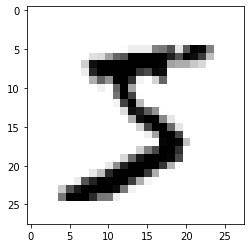

In [13]:
plt.imshow(train_X[0], cmap=plt.cm.binary)
plt.show()

In [14]:
from keras import models, layers

In [16]:
network = models.Sequential()
network.add(layers.Dense(512, input_shape=(28 * 28, ), activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

In [19]:
network.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

In [20]:
train_X = train_X.reshape((60000, 28 * 28))
train_X = train_X.astype('float') / 255

test_X = test_X.reshape((10000, 28 * 28))
test_X = test_X.astype('float') / 255

In [21]:
from keras.utils import to_categorical

In [22]:
train_y = to_categorical(train_y) # one-hot-encoding
test_y = to_categorical(test_y)

In [23]:
train_y[0]

array([0., 0., 0., 0., 0., 1., 0., 0., 0., 0.], dtype=float32)

In [28]:
network.fit(train_X, train_y, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0026 - accuracy: 0.9994
Epoch 2/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0018 - accuracy: 0.9995
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0014 - accuracy: 0.9995
Epoch 4/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0013 - accuracy: 0.9996
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 9.1266e-04 - accuracy: 0.9997


In [29]:
test_loss, test_accuracy = network.evaluate(test_X, test_y)

313/313 [==============================] - 1s 2ms/step - loss: 0.0990 - accuracy: 0.9818


In [30]:
test_loss, test_accuracy

(0.09903537482023239, 0.9818000197410583)